### Part II.6 Pandas와 시계열 분석 

In [1]:
import numpy as np 
import pandas as pd 

### <u> 1. date_range를 사용하여 DatetimeIndex 생성하기 </u>
- date_range("start_day", "end_day", freq = "D") 
- date_range("start_day", periods = , freq = "D") 

In [2]:
daily_index_1 = pd.date_range('2022-01-01', '2022-01-31', freq = 'D')
daily_index_1

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10', '2022-01-11', '2022-01-12',
               '2022-01-13', '2022-01-14', '2022-01-15', '2022-01-16',
               '2022-01-17', '2022-01-18', '2022-01-19', '2022-01-20',
               '2022-01-21', '2022-01-22', '2022-01-23', '2022-01-24',
               '2022-01-25', '2022-01-26', '2022-01-27', '2022-01-28',
               '2022-01-29', '2022-01-30', '2022-01-31'],
              dtype='datetime64[ns]', freq='D')

In [3]:
daily_index_2 = pd.date_range('2022-01-01', periods = 10, freq = 'D')  ## 시작날짜로 부터 10개 만들기 
daily_index_2

DatetimeIndex(['2022-01-01', '2022-01-02', '2022-01-03', '2022-01-04',
               '2022-01-05', '2022-01-06', '2022-01-07', '2022-01-08',
               '2022-01-09', '2022-01-10'],
              dtype='datetime64[ns]', freq='D')

In [4]:
weekly_index = pd.date_range('2022-01-01', '2022-01-31', freq = 'W-SUN')  ## 매주 일요일 인덱스 만들기
weekly_index

DatetimeIndex(['2022-01-02', '2022-01-09', '2022-01-16', '2022-01-23',
               '2022-01-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [5]:
hour_index = pd.date_range('2022-01-01', periods = 24, freq = 'H')  ## hour 인덱스 만들기
hour_index

DatetimeIndex(['2022-01-01 00:00:00', '2022-01-01 01:00:00',
               '2022-01-01 02:00:00', '2022-01-01 03:00:00',
               '2022-01-01 04:00:00', '2022-01-01 05:00:00',
               '2022-01-01 06:00:00', '2022-01-01 07:00:00',
               '2022-01-01 08:00:00', '2022-01-01 09:00:00',
               '2022-01-01 10:00:00', '2022-01-01 11:00:00',
               '2022-01-01 12:00:00', '2022-01-01 13:00:00',
               '2022-01-01 14:00:00', '2022-01-01 15:00:00',
               '2022-01-01 16:00:00', '2022-01-01 17:00:00',
               '2022-01-01 18:00:00', '2022-01-01 19:00:00',
               '2022-01-01 20:00:00', '2022-01-01 21:00:00',
               '2022-01-01 22:00:00', '2022-01-01 23:00:00'],
              dtype='datetime64[ns]', freq='H')

### <u> 2. 문자열을 timestamp로 변환하기 </u>
1) 해당컬럼에 대해 to_datetime 함수를 실행한다. 
2) 데이터를 읽어올때 parse_dates 인자를 사용한다. 

In [6]:
msft = pd.read_csv('python-for-excel-1st-edition/csv/MSFT.csv')
msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8622 non-null   object 
 1   Open       8622 non-null   float64
 2   High       8622 non-null   float64
 3   Low        8622 non-null   float64
 4   Close      8622 non-null   float64
 5   Adj Close  8622 non-null   float64
 6   Volume     8622 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 471.6+ KB


In [7]:
## to_datetime 
msft.loc[:, 'Date'] = pd.to_datetime(msft['Date'])

msft.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8622 entries, 0 to 8621
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       8622 non-null   datetime64[ns]
 1   Open       8622 non-null   float64       
 2   High       8622 non-null   float64       
 3   Low        8622 non-null   float64       
 4   Close      8622 non-null   float64       
 5   Adj Close  8622 non-null   float64       
 6   Volume     8622 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 471.6 KB


In [8]:
## parse_dates
msft_2 = pd.read_csv('python-for-excel-1st-edition/csv/MSFT.csv', index_col = 'Date', parse_dates = ['Date'])
msft_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8622 entries, 1986-03-13 to 2020-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8622 non-null   float64
 1   High       8622 non-null   float64
 2   Low        8622 non-null   float64
 3   Close      8622 non-null   float64
 4   Adj Close  8622 non-null   float64
 5   Volume     8622 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 471.5 KB


In [9]:
msft_2.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062760,47894400


### <i> tips </i>
- int64 타입인 Volume 변수는 타입을 변경해 주는 것이 좋겠다. 
- 시계열 분석 전에 먼저 인덱스를 정렬해 주는 것이 좋다. 

In [10]:
msft_2.loc[:, 'Volume'] = msft_2['Volume'].astype('float64')

msft_2 = msft_2.sort_index()

msft_2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8622 entries, 1986-03-13 to 2020-05-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       8622 non-null   float64
 1   High       8622 non-null   float64
 2   Low        8622 non-null   float64
 3   Close      8622 non-null   float64
 4   Adj Close  8622 non-null   float64
 5   Volume     8622 non-null   float64
dtypes: float64(6)
memory usage: 471.5 KB


### <u> 3. Datetime_Index에서 특정 기간 추출하기 </u>
- 연도 또는 연월 등을 기입하면, 판다스가 알아서 슬라이스로 바꿔 찾아내 준다(매우 편리)

<AxesSubplot:xlabel='Date'>

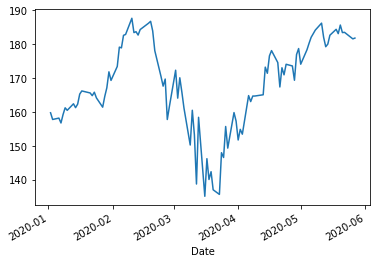

In [11]:
msft_2.loc['2020', 'Adj Close'].plot()

<AxesSubplot:xlabel='Date'>

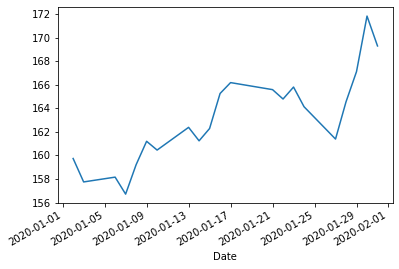

In [12]:
msft_2.loc['2020-01-01':'2020-01-31', 'Adj Close'].plot()

### <u> 4. pct_change() 사용하여 일자별 변화율 구하기 </u>

In [29]:
msft.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062760,47894400
5,1986-03-20,0.098090,0.098090,0.094618,0.095486,0.061094,58435200
6,1986-03-21,0.095486,0.097222,0.091146,0.092882,0.059428,59990400
7,1986-03-24,0.092882,0.092882,0.089410,0.090278,0.057762,65289600
8,1986-03-25,0.090278,0.092014,0.089410,0.092014,0.058873,32083200
9,1986-03-26,0.092014,0.095486,0.091146,0.094618,0.060539,22752000


In [28]:
msft['Adj Close'].pct_change()

0            NaN
1       0.035721
2       0.017229
3      -0.025421
4      -0.017394
          ...   
8617    0.013871
8618   -0.012011
8619    0.000436
8620   -0.010572
8621    0.001322
Name: Adj Close, Length: 8622, dtype: float64

### 5. <u> 애플, 아마존, 구글, MS의 주가추이를 다운받아 합치기 </u>
- usecols = [] 을 사용하여 특정 컬럼만 가져올 수 있다.

In [33]:
parts = []

for i in ['AAPL', 'AMZN', 'GOOGL', 'MSFT'] : 
    ## Date와 Adj Close(조정종가) 컬럼만 불러온다. 
    adj_close = pd.read_csv(f'python-for-excel-1st-edition/csv/{i}.csv', 
                            index_col = 'Date', parse_dates = ['Date'], 
                            usecols = ['Date', 'Adj Close'] ) 
    
    ## 컬럼명(Adj_Close)를 회사명으로 변경 
    adj_close = adj_close.rename(columns = {'Adj Close' : i})
    
    ## parts 리스트에 4회사의 데이터 프레임을 이어 붙인다. 
    parts.append(adj_close)   

In [34]:
parts

[                  AAPL
 Date                  
 1980-12-12    0.405683
 1980-12-15    0.384517
 1980-12-16    0.356296
 1980-12-17    0.365115
 1980-12-18    0.375698
 ...                ...
 2020-05-22  318.890015
 2020-05-26  316.730011
 2020-05-27  318.109985
 2020-05-28  318.250000
 2020-05-29  317.940002
 
 [9950 rows x 1 columns],
                    AMZN
 Date                   
 1997-05-15     1.958333
 1997-05-16     1.729167
 1997-05-19     1.708333
 1997-05-20     1.635417
 1997-05-21     1.427083
 ...                 ...
 2020-05-22  2436.879883
 2020-05-26  2421.860107
 2020-05-27  2410.389893
 2020-05-28  2401.100098
 2020-05-29  2442.370117
 
 [5798 rows x 1 columns],
                   GOOGL
 Date                   
 2004-08-19    50.220219
 2004-08-20    54.209209
 2004-08-23    54.754753
 2004-08-24    52.487488
 2004-08-25    53.053055
 ...                 ...
 2020-05-22  1413.239990
 2020-05-26  1421.369995
 2020-05-27  1420.280029
 2020-05-28  1418.239990
 2020-0

In [35]:
## 4개의 데이터 프레임을 하나로 조합 
adj_close = pd.concat(parts, axis = 1)
adj_close

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
1980-12-12,0.405683,NaN,NaN,NaN
1980-12-15,0.384517,NaN,NaN,NaN
1980-12-16,0.356296,NaN,NaN,NaN
1980-12-17,0.365115,NaN,NaN,NaN
1980-12-18,0.375698,NaN,NaN,NaN
...,...,...,...,...
2020-05-22,318.890015,2436.879883,1413.239990,183.509995
2020-05-26,316.730011,2421.860107,1421.369995,181.570007
2020-05-27,318.109985,2410.389893,1420.280029,181.809998


<AxesSubplot:xlabel='Date'>

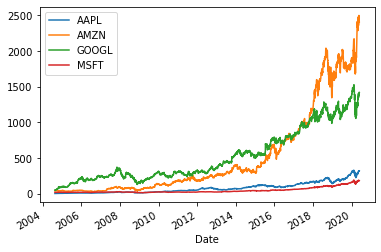

In [36]:
## missing_value를 제거하고, charting한다. 
adj_close = adj_close.dropna()
adj_close.plot()

In [45]:
## 전일대비 주가 변화율 추이 비교 
returns = adj_close.pct_change()
print(returns.head(10))

                AAPL      AMZN     GOOGL      MSFT
Date                                              
2004-08-19       NaN       NaN       NaN       NaN
2004-08-20  0.002931  0.022780  0.079430  0.002950
2004-08-23  0.009091 -0.001519  0.010064  0.004424
2004-08-24  0.027992 -0.010139 -0.041408  0.000000
2004-08-25  0.034429  0.032010  0.010775  0.011380
2004-08-26  0.048714 -0.002730  0.018019 -0.003993
2004-08-27 -0.008944 -0.007216 -0.016310  0.000729
2004-08-30 -0.006696 -0.039850 -0.039001 -0.005826
2004-08-31  0.010844 -0.004438  0.003529  0.000000
2004-09-01  0.039722  0.002622 -0.020709  0.003297


[Text(0.5, 1.0, 'MSFT')]

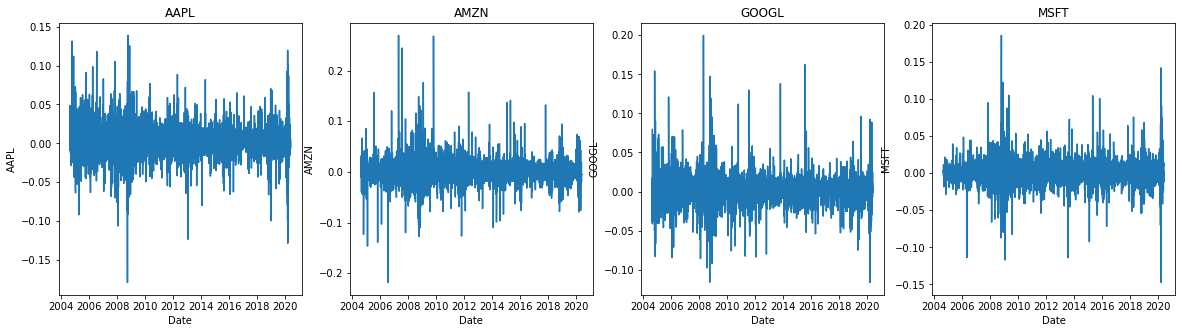

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

figure, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4)
figure.set_size_inches(20,5)

sns.lineplot(data = returns, x='Date', y='AAPL', ax=ax1)
sns.lineplot(data = returns, x='Date', y='AMZN', ax=ax2)
sns.lineplot(data = returns, x='Date', y='GOOGL', ax=ax3)
sns.lineplot(data = returns, x='Date', y='MSFT', ax=ax4)

ax1.set(title = 'AAPL')
ax2.set(title = 'AMZN')
ax3.set(title = 'GOOGL')
ax4.set(title = 'MSFT')

In [56]:
returns.corr()

,AAPL,AMZN,GOOGL,MSFT
AAPL,1.000000,0.420464,0.497796,0.484678
AMZN,0.420464,1.000000,0.480418,0.484218
GOOGL,0.497796,0.480418,1.000000,0.521593
MSFT,0.484678,0.484218,0.521593,1.000000


### 6. <u> 시계열의 resample </u>
- 일별 데이터에서 월별, 분기별, 연도별 데이터를 추출할 때 

In [58]:
adj_close.head(10)

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2004-08-19,1.898969,38.630001,50.220219,17.505459
2004-08-20,1.904534,39.509998,54.209209,17.557100
2004-08-23,1.921849,39.450001,54.754753,17.634779
2004-08-24,1.975645,39.049999,52.487488,17.634779
2004-08-25,2.043664,40.299999,53.053055,17.835468
2004-08-26,2.143219,40.189999,54.009010,17.764256
2004-08-27,2.124051,39.900002,53.128128,17.777203
2004-08-30,2.109828,38.310001,51.056057,17.673630
2004-08-31,2.132708,38.139999,51.236237,17.673630


In [59]:
end_of_month = adj_close.resample('M').last()    ## last() : 월말 기준 
end_of_month

,AAPL,AMZN,GOOGL,MSFT
Date,,,,
2004-08-31,2.132708,38.139999,51.236237,17.673630
2004-09-30,2.396127,40.860001,64.864868,17.900215
2004-10-31,3.240182,34.130001,95.415413,18.107374
2004-11-30,4.146072,39.680000,91.081078,19.344421
2004-12-31,3.982207,44.290001,96.491493,19.279480
...,...,...,...,...
2020-01-31,307.943604,2008.719971,1432.780029,169.294800
2020-02-29,272.622009,1883.750000,1339.250000,161.560043
2020-03-31,253.603500,1949.719971,1161.949951,157.271988


In [73]:
end_of_week = adj_close.resample('W').last() 
end_of_quarter = adj_close.resample('Q').last() 
end_of_year = adj_close.resample('Y').last() 

print(end_of_week.head(10))
print('---------------------------------------------------------------------')
print(end_of_quarter.head(10))
print('---------------------------------------------------------------------')
print(end_of_year.head(10))

                AAPL       AMZN      GOOGL       MSFT
Date                                                 
2004-08-22  1.904534  39.509998  54.209209  17.557100
2004-08-29  2.124051  39.900002  53.128128  17.777203
2004-09-05  2.178466  38.740002  50.055054  17.550623
2004-09-12  2.218040  38.570000  52.717716  17.796631
2004-09-19  2.296572  42.959999  58.803802  17.809576
2004-09-26  2.305847  40.939999  59.974976  17.667152
2004-10-03  2.391179  40.470001  66.356354  18.288649
2004-10-10  2.415296  40.000000  68.933937  18.120325
2004-10-17  2.813517  38.549999  72.127129  18.120325
2004-10-24  2.931623  34.599998  86.301300  17.958473
---------------------------------------------------------------------
                 AAPL       AMZN       GOOGL       MSFT
Date                                                   
2004-09-30   2.396127  40.860001   64.864868  17.900215
2004-12-31   3.982207  44.290001   96.491493  19.279480
2005-03-31   5.153373  34.270000   90.345345  17.493368
20

### 7. <u> 이동평균 구하기 </u>
- rolling().mean() 사용  

In [78]:
msft.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062760,47894400


In [83]:
## 기존의 인덱스를 리셋하고, Date 컬럼을 인덱스로 지정한다. 
df = msft.reset_index().set_index('Date')
df

,index,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,
1986-03-13,0,0.088542,0.101563,0.088542,0.097222,0.062205,1031788800
1986-03-14,1,0.097222,0.102431,0.097222,0.100694,0.064427,308160000
1986-03-17,2,0.100694,0.103299,0.100694,0.102431,0.065537,133171200
1986-03-18,3,0.102431,0.103299,0.098958,0.099826,0.063871,67766400
1986-03-19,4,0.099826,0.100694,0.097222,0.098090,0.062760,47894400
...,...,...,...,...,...,...,...
2020-05-20,8617,184.809998,185.850006,183.940002,185.660004,185.660004,31261300
2020-05-21,8618,185.399994,186.669998,183.289993,183.429993,183.429993,29119500
2020-05-22,8619,183.190002,184.460007,182.539993,183.509995,183.509995,20826900


             Adj Close  7days Moving Avg
Date                                    
2020-01-02  159.737595               NaN
2020-01-03  157.748581               NaN
2020-01-06  158.156342               NaN
2020-01-07  156.714310               NaN
2020-01-08  159.210495               NaN
2020-01-09  161.199509               NaN
2020-01-10  160.453644        159.031497
2020-01-13  162.382980        159.409409
2020-01-14  161.239304        159.908083
2020-01-15  162.283539        160.497683


<AxesSubplot:xlabel='Date'>

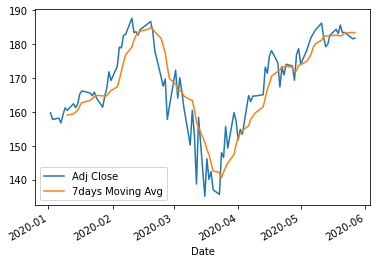

In [92]:
## 일주일 단위 이동평균을 구하고 차트를 만든다. 
msft_2020 = df.loc['2020', ['Adj Close']] 
msft_2020.loc[:, '7days Moving Avg'] = msft_2020['Adj Close'].rolling(7).mean()
print(msft_2020.head(10)) 

msft_2020.plot()